**March** 8 - 12, 2021

- Analysis of the XRD data using the PCA/NMF, manifold learning, and VAE
- Data from Oliver Hoidn <ohoidn@gmail.com> and Apurva Mehta, SLAC
- Additional info can be found at https://github.com/aoluwade/SLAC2020_SSRL-Internship/tree/master/Jupyter%20notebooks
- As a part of collboration under the NSRC-AI project, PI Alex Hexemer
- Workflow by Sergei V. Kalinin
- VAE realized via AtomAI by M. Ziatdinov
- Shift 1D VAE realized in PyroVED by M. Ziatdonov specifically for this project 
- Comment: ask for CNMS proposal (for shift VAE)

# Data load

In [ ]:
#!gdown --id 1wu0BW4CCpuhNV_3lk4vB40fpzkyuMqpz
#!gdown --id 1thrXCE2X3Xr3jRK58i8b4NmPwWrBcJdo

!gdown --id 1wu0BW4CCpuhNV_3lk4vB40fpzkyuMqpz
!gdown --id 1thrXCE2X3Xr3jRK58i8b4NmPwWrBcJdo

Downloading...
From: https://drive.google.com/uc?id=1wu0BW4CCpuhNV_3lk4vB40fpzkyuMqpz
To: /content/TiNiSn_500C_Y20190218_14x14_t60_bkgdSub_1D.dgrid.pkl
2.28MB [00:00, 150MB/s]
Downloading...
From: https://drive.google.com/uc?id=1thrXCE2X3Xr3jRK58i8b4NmPwWrBcJdo
To: /content/TiNiSn_500C_Y20190218_14x14_t60_bkgdSub_1D_y.npy
100% 1.54k/1.54k [00:00<00:00, 1.43MB/s]


In [ ]:
!wget https://raw.githubusercontent.com/aoluwade/SLAC2020_SSRL-Internship/master/Clustering/data_grid.py

--2021-03-12 11:51:44--  https://raw.githubusercontent.com/aoluwade/SLAC2020_SSRL-Internship/master/Clustering/data_grid.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6593 (6.4K) [text/plain]
Saving to: ‘data_grid.py’

data_grid.py        100%[===================>]   6.44K  --.-KB/s    in 0s      

2021-03-12 11:51:44 (79.6 MB/s) - ‘data_grid.py’ saved [6593/6593]



In [1]:
import dill
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.load("data/CoNi_shift_2/test/x.npy")

In [3]:
Y = np.load("data/CoNi_shift_2/test/y.npy")

In [ ]:
# with open("TiNiSn_500C_Y20190218_14x14_t60_bkgdSub_1D.dgrid.pkl", "rb") as f:
#     dgrid = dill.load(f)

In [ ]:
# q = dgrid.data[1][:,0] # q grid
# X = dgrid.get_data_array() # array of XRD patterns
# Y = np.load("TiNiSn_500C_Y20190218_14x14_t60_bkgdSub_1D_y.npy") # corresponding ground truth phase labels

(177, 800)


In [ ]:
X.shape, Y.shape, q.shape

((177, 800), (177,), (800,))

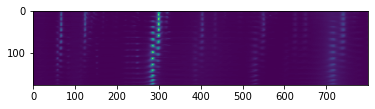

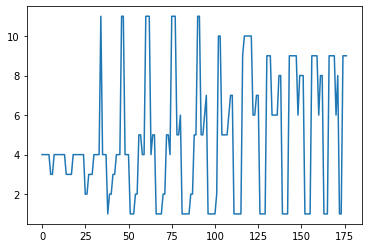

In [ ]:
plt.imshow(X)
plt.show()

plt.plot(Y)

In [ ]:
#!gdown --id 1M1j8PJjBl01LyaNmrnCw8WW5s6U_qCv-
!gdown --id 1M1j8PJjBl01LyaNmrnCw8WW5s6U_qCv-

Downloading...
From: https://drive.google.com/uc?id=1M1j8PJjBl01LyaNmrnCw8WW5s6U_qCv-
To: /content/tinisn.tar.gz
41.1MB [00:00, 66.8MB/s]


Let's also make coordinate array for plotting

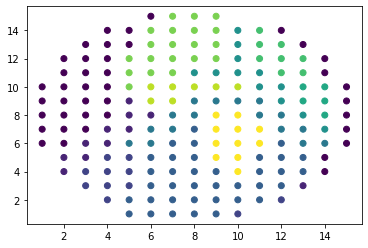

In [ ]:
coords = []

for i in range(177):
  coords.append(dgrid.coord(i))

coords = np.array(coords)
plt.scatter(coords[:,0], coords[:,1], c = Y)

# PCA/NMF

In [ ]:
import numpy as np

from sklearn.cluster import KMeans
from sklearn import mixture
from sklearn import decomposition

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [ ]:
d1, d2 = X.shape
X_vec = X.copy()

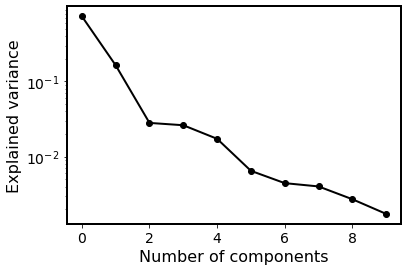

In [ ]:
from pylab import *
ax = gca()

pca = decomposition.PCA()
pca.fit(X_vec)
#plt.figure(figsize=(6, 4), dpi = 96)
plt.plot(pca.explained_variance_ratio_[0:10], '-o', linewidth=2, c = 'black')
plt.xlabel('Number of components', fontsize = 16)
plt.ylabel('Explained variance', fontsize = 16)

plt.tick_params(labelsize = 14)

for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(2)

plt.yscale('log')

In [ ]:
# Select number of components
nc = 12 

# Select decomposition type ('PCA' or 'NMF')
decomposition_type = 'PCA'

# Run decomposition
if decomposition_type == 'NMF':
    clf = decomposition.NMF(n_components=nc, random_state=42)
elif decomposition_type == 'PCA':
    clf = decomposition.PCA(n_components=nc, random_state=42)
else:
    raise NotImplementedError('Available methods: "PCA", "NMF"')
X_vec_t = clf.fit_transform(X_vec)
components = clf.components_
print(components.shape, X_vec_t.shape)

(12, 800) (177, 12)


NUMBER OF COMPONENTS: 12
Components...


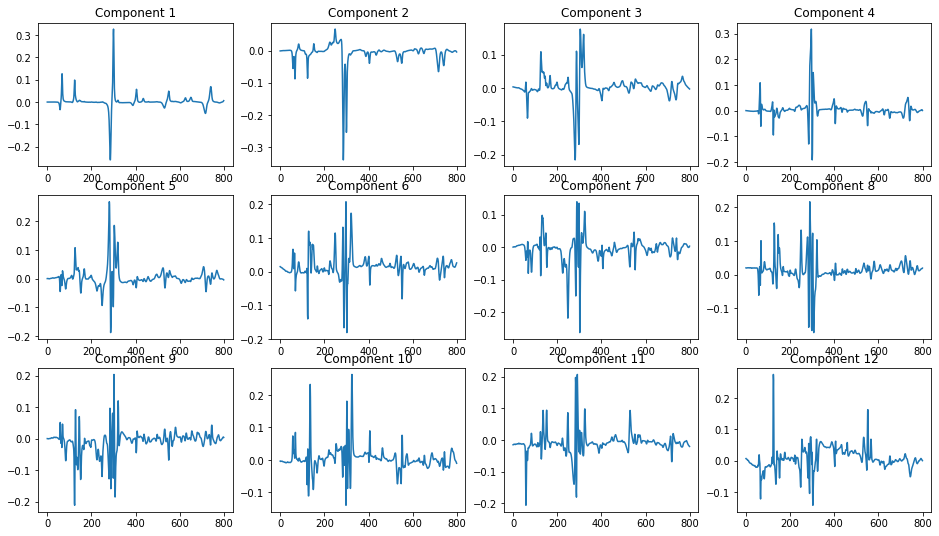

Abundance maps...


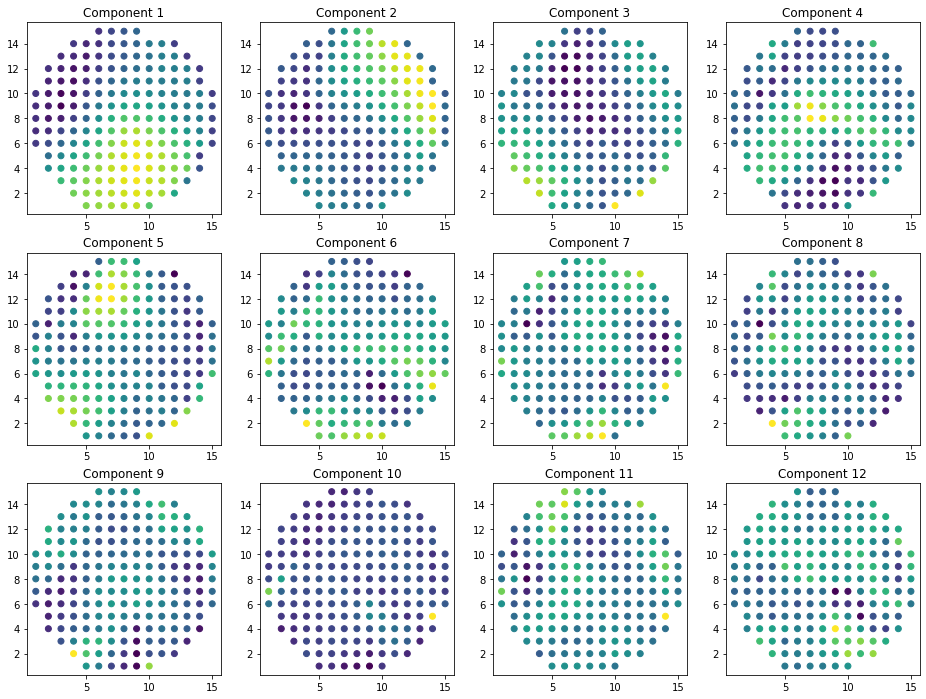

In [ ]:
rows = int(np.ceil(float(nc)/5))
cols = int(np.ceil(float(nc)/rows))

print('NUMBER OF COMPONENTS: ' + str(nc))
print('Components...')
gs1 = gridspec.GridSpec(rows, cols)
fig1 = plt.figure(figsize = (4*cols, 3.5*(1+rows)//1.5))   
for i in range(nc):
    ax1 = fig1.add_subplot(gs1[i])
    j = 0
    ax1.plot(components[i])
    ax1.set_title('Component ' + str(i + 1))
plt.show()

print('Abundance maps...')
gs2 = gridspec.GridSpec(rows, cols)
fig2 = plt.figure(figsize = (4*cols, 4*(1+rows//1.5)))   
for i in range(nc):
    ax2 = fig2.add_subplot(gs2[i])
    #ax2.plot(X_vec_t[:, i])
    plt.scatter(coords[:,0], coords[:,1], c = X_vec_t[:, i])
    ax2.set_title('Component ' + str(i + 1))
plt.show()

In [ ]:
coords.shape

(177, 2)

# Clustering in different spaces

A
B
C
D


Text(0.5, 1.0, 'ISO')

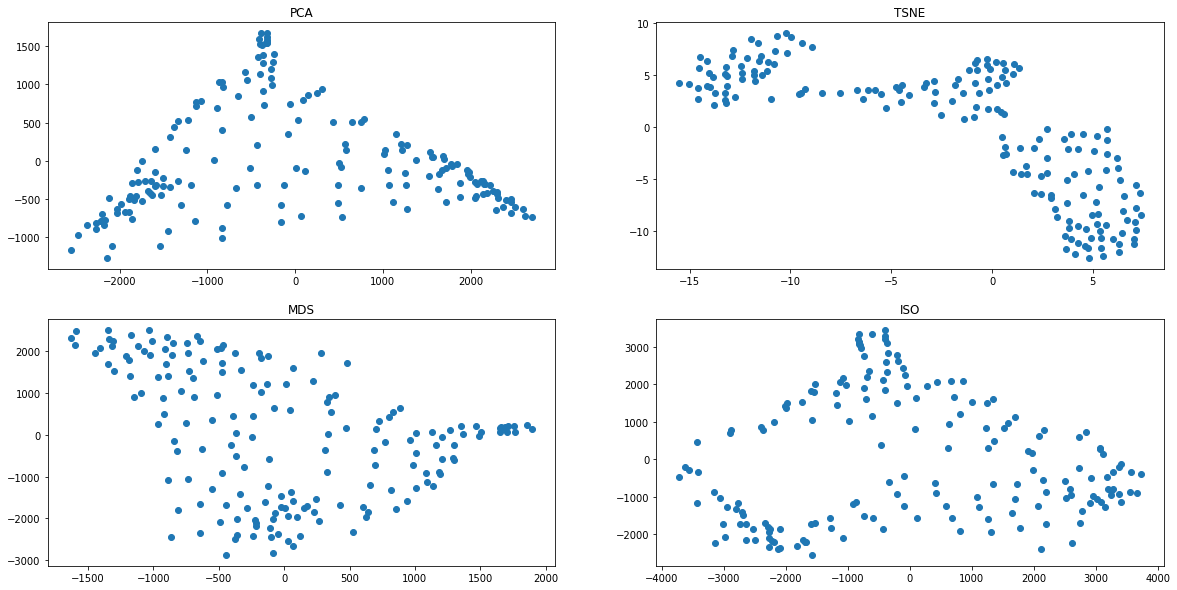

In [ ]:
z = X.copy()

import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.manifold import TSNE, MDS, Isomap
import matplotlib.pyplot as plt

z_pca = PCA(n_components = 2).fit_transform(z)
print('A')
z_tsne = TSNE(learning_rate=200).fit_transform(z)
print('B')
z_MDS = MDS(n_components = 2).fit_transform(z)
print('C')
z_ISO = Isomap(n_components = 2).fit_transform(z)
print('D')

plt.figure(figsize=(20, 10))
plt.subplot(221)
plt.title('PCA')
plt.scatter(z_pca [:, 0], z_pca [:, 1])

plt.subplot(222)
plt.scatter(z_tsne[:, 0], z_tsne[:, 1])
plt.title('TSNE')

plt.subplot(223)
plt.scatter(z_MDS[:, 0], z_MDS[:, 1])
plt.title('MDS')

plt.subplot(224)
plt.scatter(z_ISO[:, 0], z_ISO[:, 1])
plt.title('ISO')

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=8) #diag
gmm_zpp = gmm.fit_predict(z)

Text(0.5, 1.0, 'ISO')

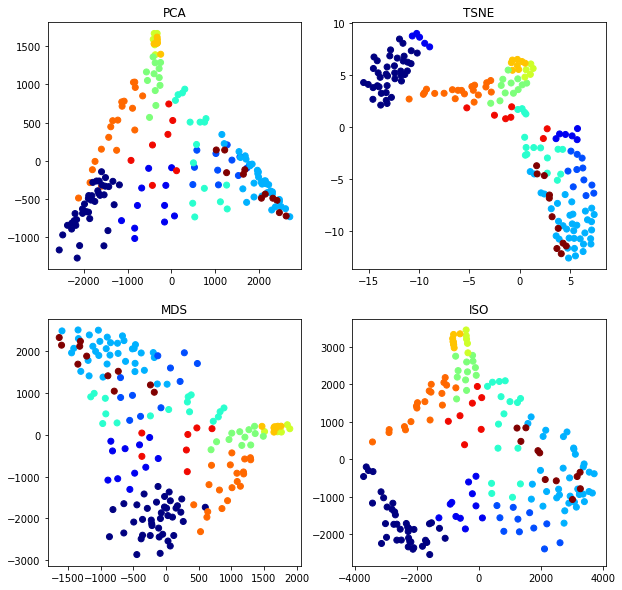

In [ ]:
color_arr = Y #gmm_zpp # Y

plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.title('PCA')
plt.scatter(z_pca [:, 0], z_pca [:, 1], c = color_arr, cmap = 'jet') #kmeans.labels_

plt.subplot(222)
plt.scatter(z_tsne[:, 0], z_tsne[:, 1], c = color_arr, cmap = 'jet')
plt.title('TSNE')

plt.subplot(223)
plt.scatter(z_MDS[:, 0], z_MDS[:, 1], c = color_arr, cmap = 'jet')
plt.title('MDS')

plt.subplot(224)
plt.scatter(z_ISO[:, 0], z_ISO[:, 1], c = color_arr, cmap = 'jet')
plt.title('ISO')

# 1D VAE

(177, 800)


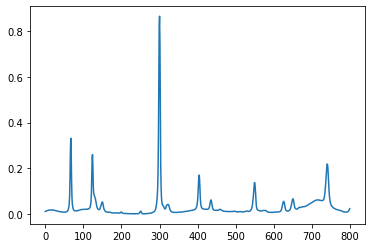

In [ ]:
# print(feature_arr.shape)

X_train = X.copy()

# subtract average

# X_train = X_train - X_train.mean(axis = 0)


X_train_max = X_train.max()
X_train_min = X_train.min()

X_train = (X_train - X_train_min)/(X_train_max - X_train_min)

print(X_train.shape)

plt.plot(X_train[10,:])

In [ ]:
!pip install -q atomai

     |████████████████████████████████| 133kB 12.8MB/s 
     |████████████████████████████████| 194kB 10.8MB/s 
     |████████████████████████████████| 870kB 26.7MB/s 


In [ ]:
import numpy as np
import cv2

from sklearn import decomposition
from skimage import io

import pandas as pd
import seaborn as sns

import atomai as aoi
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [ ]:
X_train = np.expand_dims(X_train, axis = 2)
print(X_train.shape)

(177, 800, 1)


In [ ]:
# Try augmentation

X_train_large = []
X_temp = np.squeeze(X_train)
for i, obj in enumerate(X_temp):
  for j in range(100):
    X_train_large.append(obj+np.random.normal(0, 0.01, len(obj)))

X_train_large = np.array(X_train_large)
X_train_large = np.expand_dims(X_train_large, axis = 2)
print(X_train_large.shape)

(17700, 800, 1)


In [ ]:
input_dim = (X_train.shape[1], 1)

# Intitialize model
vae = aoi.models.VAE(input_dim, latent_dim=2, 
                        numlayers_encoder=3, numhidden_encoder=512,
                        numlayers_decoder=3, numhidden_decoder=512,
                        skip=True) 
# Train
vae.fit(X_train_large, training_cycles=600, batch_size=32, loss="mse")

Epoch: 1/600, Training loss: 0.6098
Epoch: 2/600, Training loss: 0.5506
Epoch: 3/600, Training loss: 0.5479
Epoch: 4/600, Training loss: 0.5465
Epoch: 5/600, Training loss: 0.5459
Epoch: 6/600, Training loss: 0.5458
Epoch: 7/600, Training loss: 0.5448
Epoch: 8/600, Training loss: 0.5452
Epoch: 9/600, Training loss: 0.5446
Epoch: 10/600, Training loss: 0.5440
Epoch: 11/600, Training loss: 0.5444
Epoch: 12/600, Training loss: 0.5437
Epoch: 13/600, Training loss: 0.5442
Epoch: 14/600, Training loss: 0.5436
Epoch: 15/600, Training loss: 0.5436
Epoch: 16/600, Training loss: 0.5434
Epoch: 17/600, Training loss: 0.5431
Epoch: 18/600, Training loss: 0.5433
Epoch: 19/600, Training loss: 0.5431
Epoch: 20/600, Training loss: 0.5430
Epoch: 21/600, Training loss: 0.5431
Epoch: 22/600, Training loss: 0.5432
Epoch: 23/600, Training loss: 0.5429
Epoch: 24/600, Training loss: 0.5428
Epoch: 25/600, Training loss: 0.5428
Epoch: 26/600, Training loss: 0.5423
Epoch: 27/600, Training loss: 0.5424
Epoch: 28/

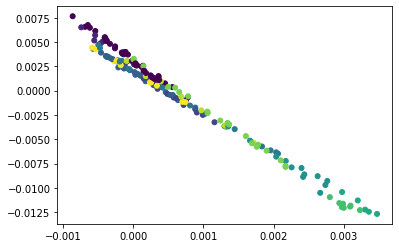

In [ ]:
z_mean, z_sd = vae.encode(X_train)
plt.scatter(z_mean[:,0], z_mean[:,1], c = Y, s = 25)

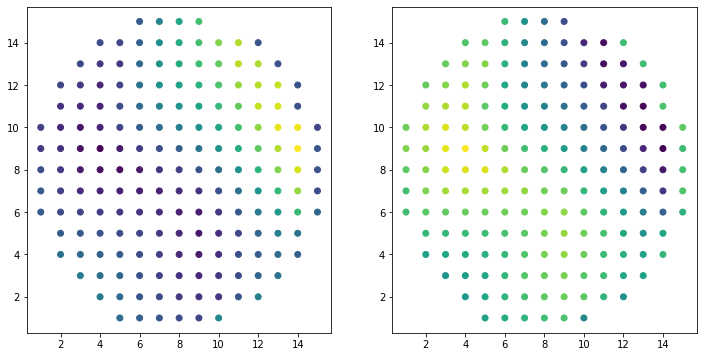

In [ ]:
# Plot on a grid

_, (ax0, ax1) = plt.subplots(1,2, figsize = (12, 6))
ax0.scatter(coords[:,0], coords[:,1], c = z_mean[:,0])
ax1.scatter(coords[:,0], coords[:,1], c = z_mean[:,1])

In [ ]:
z_mean.shape

(177, 2)

# 1D jVAE

In [ ]:
input_dim = (X_train.shape[1], 1)

# Intitialize model
jvae = aoi.models.jVAE(input_dim, latent_dim=2, discrete_dim=[4],
                        numlayers_encoder=3, numhidden_encoder=512,
                        numlayers_decoder=3, numhidden_decoder=512,
                        skip=False) 
# Train
jvae.fit(X_train, training_cycles=600, batch_size=32, loss="ce")

Epoch: 1/600, Training loss: 551.8162
Epoch: 2/600, Training loss: 536.9695
Epoch: 3/600, Training loss: 514.0093
Epoch: 4/600, Training loss: 475.4221
Epoch: 5/600, Training loss: 418.8889
Epoch: 6/600, Training loss: 346.7376
Epoch: 7/600, Training loss: 274.0083
Epoch: 8/600, Training loss: 208.4828
Epoch: 9/600, Training loss: 162.9473
Epoch: 10/600, Training loss: 133.0532
Epoch: 11/600, Training loss: 116.0818
Epoch: 12/600, Training loss: 105.2320
Epoch: 13/600, Training loss: 98.8708
Epoch: 14/600, Training loss: 95.3662
Epoch: 15/600, Training loss: 92.6482
Epoch: 16/600, Training loss: 90.2715
Epoch: 17/600, Training loss: 89.0946
Epoch: 18/600, Training loss: 88.2122
Epoch: 19/600, Training loss: 87.6318
Epoch: 20/600, Training loss: 87.0517
Epoch: 21/600, Training loss: 86.7200
Epoch: 22/600, Training loss: 86.5909
Epoch: 23/600, Training loss: 85.6981
Epoch: 24/600, Training loss: 85.5934
Epoch: 25/600, Training loss: 85.9381
Epoch: 26/600, Training loss: 85.4085
Epoch: 27

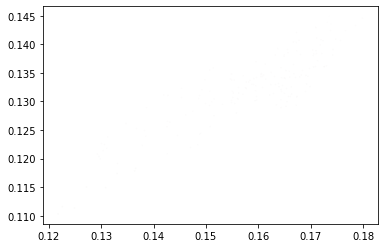

In [ ]:
a, b, c = jvae.encode(X_train)
plt.scatter(a[:,0], a[:,1], c = c, s = 1)

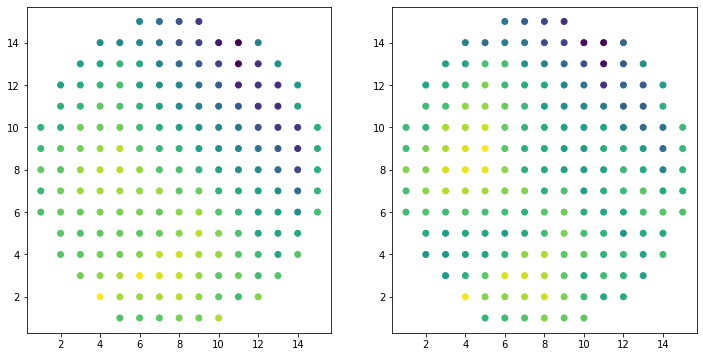

In [ ]:
# Plot on a grid

_, (ax0, ax1) = plt.subplots(1,2, figsize = (12, 6))
ax0.scatter(coords[:,0], coords[:,1], c = a[:,0])
ax1.scatter(coords[:,0], coords[:,1], c = a[:,1])

(177,)


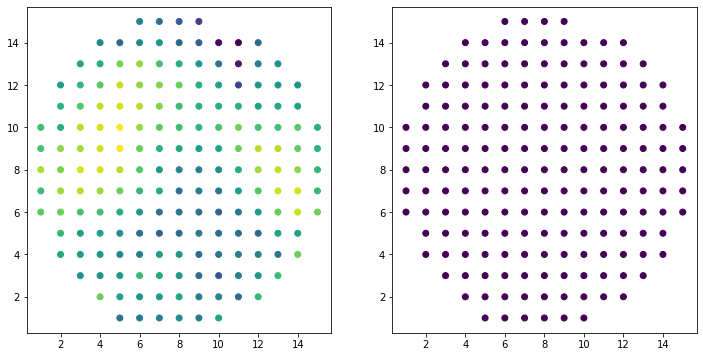

In [ ]:
ci = np.array([np.argmax(cl) for cl in c])
print(ci.shape)

# Plot on a grid 

_, (ax0, ax1) = plt.subplots(1,2, figsize = (12, 6))
ax0.scatter(coords[:,0], coords[:,1], c = c[:,0])
ax1.scatter(coords[:,0], coords[:,1], c = ci)

In [ ]:
ci

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

# Shift VAE (Pyro)

In [8]:
!pip install git+https://github.com/ziatdinovmax/pyroved

  Cloning https://github.com/ziatdinovmax/pyroved to /private/var/folders/lv/xswjq9nn5f3_lrmyfhgm4tkm0000gn/T/pip-req-build-v5qyhxtf
     |████████████████████████████████| 634 kB 7.2 MB/s eta 0:00:01
     |████████████████████████████████| 13.2 MB 11.9 MB/s eta 0:00:01
     |████████████████████████████████| 119.5 MB 11.2 MB/s eta 0:00:01
  Created wheel for pyroved: filename=pyroved-0.0.1-py3-none-any.whl size=16483 sha256=88a4cd42d60845c20b8d8cdf482fb44b7de02def45be79771c45714e5593e5b0
  Stored in directory: /private/var/folders/lv/xswjq9nn5f3_lrmyfhgm4tkm0000gn/T/pip-ephem-wheel-cache-0lgu8swp/wheels/8a/c0/fd/789c9c3290ecff8fd3f1ecb40f758149a91ce6732530676285
Successfully built pyroved
  Attempting uninstall: torch
    Found existing installation: torch 1.0.1
    Uninstalling torch-1.0.1:
      Successfully uninstalled torch-1.0.1
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.2.1
    Uninstalling torchvision-0.2.1:
      Successfully uninstalled

In [4]:
import pyroved as pv
import torch
import matplotlib.pyplot as plt

In [7]:
# Try augmentation

X_train_large = []
X_temp = X.copy()

X_train_large = X_temp = (X_temp-X_temp.min())/(X_temp.max()-X_temp.min())

# for i, obj in enumerate(X_temp):
#   for j in range(100):
#     X_train_large.append(obj+np.random.normal(0, 0.01, len(obj)))

# X_train_large = np.array(X_train_large)
# X_train_large = np.expand_dims(X_temp, axis = 2)
print(X_temp.shape, X_temp.min(), X_temp.max())

(12000, 150) 0.0 1.0


In [8]:
train_data = torch.tensor(np.squeeze(X_train_large)).float()
print(train_data.shape)
train_loader = pv.utils.init_dataloader(train_data.unsqueeze(1), batch_size=32)

torch.Size([12000, 150])


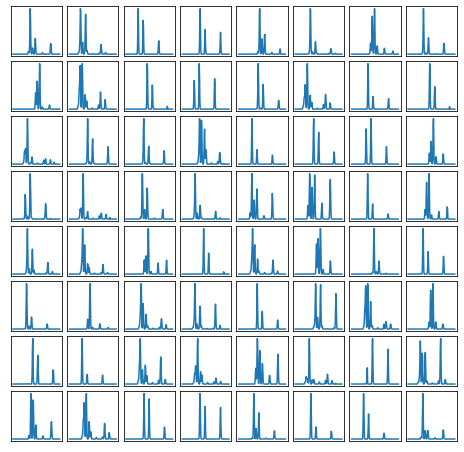

In [9]:
fig, axes = plt.subplots(8, 8, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

x = torch.linspace(-10, 10, 150)
for ax, (y,) in zip(axes.flat, train_loader):
    #print(y.shape)
    ax.plot(x, y[0, 0])

Train a regular VAE:

In [ ]:
in_dim = (150,)

# Initialize vanilla VAE
vae = pv.models.trVAE(in_dim, latent_dim=2, coord=0, seed=0)

# Initialize SVI trainer
trainer = pv.trainers.SVItrainer(vae)

# Train for n epochs:
for e in range(250):
    trainer.step(train_loader)
    trainer.print_statistics()

Encode the training data into the latent space:

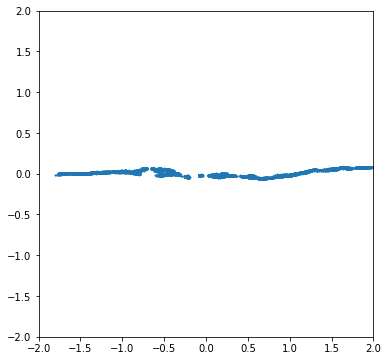

In [ ]:
z_mean, z_sd = vae.encode(train_data)
plt.figure(figsize=(6, 6))
plt.scatter(z_mean[:, -2], z_mean[:, -1], s=1)
plt.xlim(-2, 2)
plt.ylim(-2, 2);

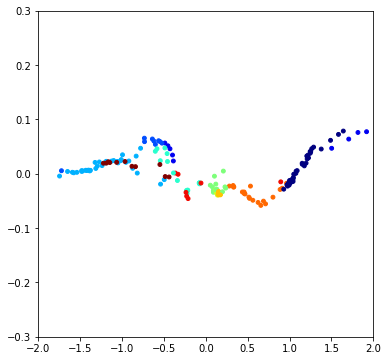

In [ ]:
X_norm = (X - X.min())/(X.max()-X.min())
train_data2 = torch.tensor(np.squeeze(X_norm)).float()

z_mean, z_sd = vae.encode(train_data2)
plt.figure(figsize=(6, 6))
plt.scatter(z_mean[:, -2], z_mean[:, -1], c = Y, s=15, cmap = 'jet')
plt.xlim(-2, 2)
plt.ylim(-0.3, 0.3);

Plot the learned manifold:

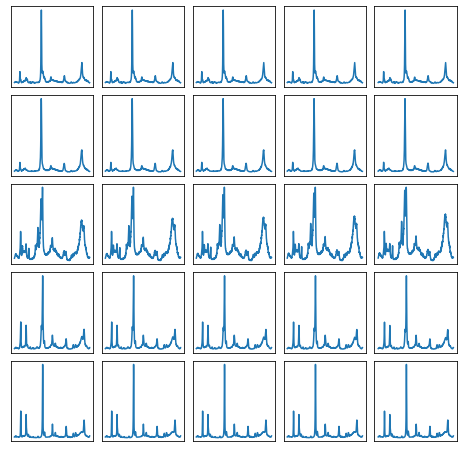

In [ ]:
vae.manifold2d(d=5);

Now train a shift-invariant VAE model (note that ```trVAE``` works both for 2D and 1D cases. For 2D case, ```coord=1``` corresponds to rotational invariance, ```coord=2``` corresponds to translational invariance, and ```coord=3``` - to both. For 1D case, we have only translational invariance so we get the same model for ```coord = 1, 2, 3``` )

In [ ]:
in_dim = (150,)

# Initialize shift-invariant VAE
shvae = pv.models.trVAE(in_dim, latent_dim=2, coord=1, seed=0)

# Initialize SVI trainer
trainer = pv.trainers.SVItrainer(shvae)

# Train for n epochs:
for e in range(250):
    trainer.step(train_loader)
    trainer.print_statistics()

Encode train data into the latent space:

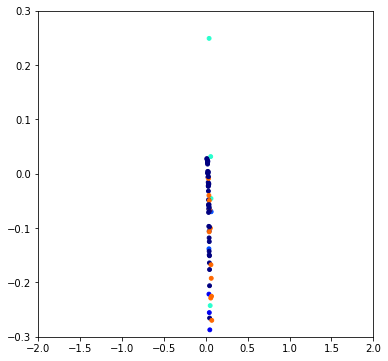

In [ ]:
X_norm = (X - X.min())/(X.max()-X.min())
train_data2 = torch.tensor(np.squeeze(X_norm)).float()

z_mean, z_sd = shvae.encode(train_data2)
plt.figure(figsize=(6, 6))
plt.scatter(z_mean[:, 1], z_mean[:, 2], c = Y, s=15, cmap = 'jet')
plt.xlim(-2, 2)
plt.ylim(-0.3, 0.3);

In [ ]:
z_mean.shape

torch.Size([177, 3])

Plot the learned manifold:

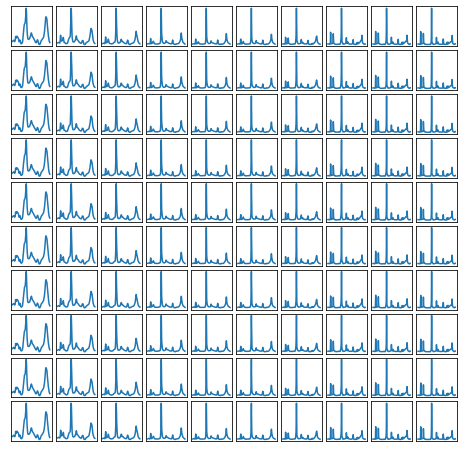

In [ ]:
shvae.manifold2d(d=10);

(0.29999999999999993, 15.7, 0.29999999999999993, 15.7)

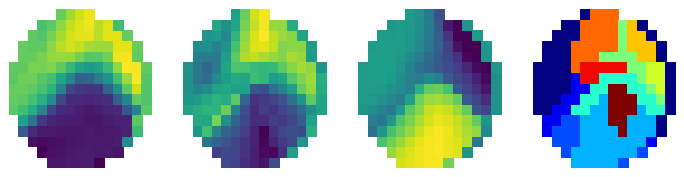

In [ ]:
# Plot on a grid

_, (ax0, ax1, ax2, ax3) = plt.subplots(1,4, figsize = (12, 3))
ax0.scatter(coords[:,0], coords[:,1], c = z_mean[:,0], marker = 's', s = 100)
ax0.axis('off')
ax1.scatter(coords[:,0], coords[:,1], c = z_mean[:,1], marker = 's', s = 100)
ax1.axis('off')
ax2.scatter(coords[:,0], coords[:,1], c = z_mean[:,2], marker = 's', s = 100)
ax2.axis('off')
ax3.scatter(coords[:,0], coords[:,1], c = Y, cmap = 'jet', marker = 's', s = 100)
ax3.axis('off')

(0.29999999999999993, 15.7, 0.29999999999999993, 15.7)

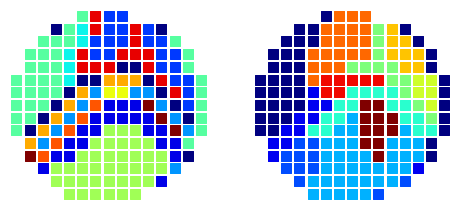

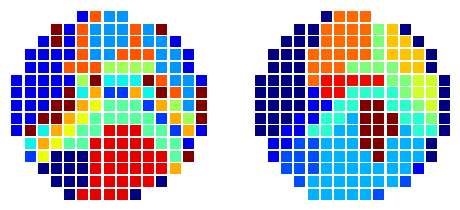

In [ ]:
z = z_mean[:,:2]
gmm = GaussianMixture(n_components=12) #diag
gmm_zpp = gmm.fit_predict(z)

_, (ax0, ax1) = plt.subplots(1,2, figsize = (8, 3.6))
ax0.scatter(coords[:,0], coords[:,1], c = gmm_zpp, cmap = 'jet', marker = 's', s = 100)
ax0.axis('off')
ax1.scatter(coords[:,0], coords[:,1], c = Y, cmap = 'jet', marker = 's', s = 100)
ax1.axis('off')


kmeans = KMeans(n_clusters=12, random_state=0).fit(z)
kmeans.labels_

_, (ax0, ax1) = plt.subplots(1,2, figsize = (8, 3.6))
ax0.scatter(coords[:,0], coords[:,1], c = kmeans.labels_, cmap = 'jet', marker = 's', s = 100)
ax0.axis('off')
ax1.scatter(coords[:,0], coords[:,1], c = Y, cmap = 'jet', marker = 's', s = 100)
ax1.axis('off')

# Bonus section - shift VAE on dummy data

In [ ]:
!pip install git+https://github.com/ziatdinovmax/pyroved@dev

  Cloning https://github.com/ziatdinovmax/pyroved (to revision dev) to /tmp/pip-req-build-2z4pgaa1
  Running command git clone -q https://github.com/ziatdinovmax/pyroved /tmp/pip-req-build-2z4pgaa1
  Running command git checkout -b dev --track origin/dev
  Switched to a new branch 'dev'
  Branch 'dev' set up to track remote branch 'dev' from 'origin'.
  Created wheel for pyroved: filename=pyroved-0.0.1-cp37-none-any.whl size=16483 sha256=e365a2bae96eeb9582ad913049aa9ad14fd4465624466495dab3cac4721ac935
  Stored in directory: /tmp/pip-ephem-wheel-cache-_1cwpule/wheels/9d/fe/79/43619ab9b429fdec44e0e8af0c0914ffdebff9083fbc138bda
Successfully built pyroved


In [ ]:
import pyroved as pv
import torch
import matplotlib.pyplot as plt

Generate 1D spectra:

In [ ]:
def gaussian(x, mu, sig):
    return torch.exp(-torch.pow(x - mu, 2.) / (2 * torch.pow(sig, 2.)))


def generate_1Dspectra(nsamples: int = 5000) -> torch.Tensor:
    x = torch.linspace(-10, 10, 100)
    dataset = []
    mu_real = []
    sig_real = []
    for _ in range(nsamples):
        noise = torch.randint(1, 100, (1,)) / 1e3
        mu = torch.randint(-30, 30, size=(1,)) / 10
        sig = torch.randint(50, 400, size=(1,)) / 1e2
        g = gaussian(x, mu, sig) + noise * torch.randn(size=(len(x),))
        dataset.append(g[None, ...])
        mu_real.append(mu)
        sig_real.append(sig)
    dataset = torch.cat(dataset)
    mu_real = torch.cat(mu_real)
    sig_real = torch.cat(sig_real)
    dataset = (dataset - dataset.min()) / (dataset.max() - dataset.min())
    return dataset, mu_real, sig_real

# Generate synthetic spectra
train_data, mu_real, sig_real = generate_1Dspectra()
# Initialize dataloader
train_loader = pv.utils.init_dataloader(train_data.unsqueeze(1), batch_size=64)

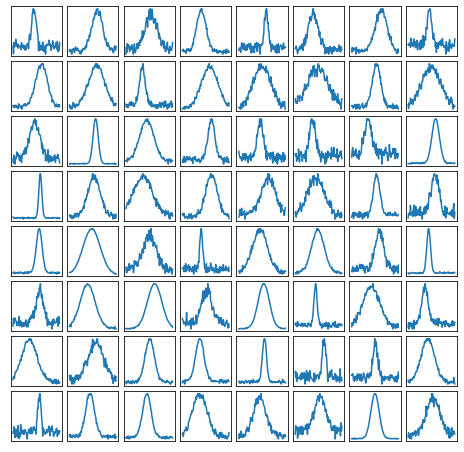

In [ ]:
fig, axes = plt.subplots(8, 8, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

x = torch.linspace(-10, 10, 100)
for ax, (y,) in zip(axes.flat, train_loader):
    ax.plot(x, y[0, 0])

Train a regular VAE:

In [ ]:
in_dim = (100,)

# Initialize vanilla VAE
vae = pv.models.trVAE(in_dim, latent_dim=2, coord=0, seed=0)

# Initialize SVI trainer
trainer = pv.trainers.SVItrainer(vae)

# Train for n epochs:
for e in range(250):
    trainer.step(train_loader)
    trainer.print_statistics()

Epoch: 1 Training loss: 63.1464
Epoch: 2 Training loss: 61.6939
Epoch: 3 Training loss: 61.5782
Epoch: 4 Training loss: 61.5385
Epoch: 5 Training loss: 61.5075
Epoch: 6 Training loss: 61.2960
Epoch: 7 Training loss: 61.0900
Epoch: 8 Training loss: 61.0724
Epoch: 9 Training loss: 61.0057
Epoch: 10 Training loss: 61.0090
Epoch: 11 Training loss: 60.9841
Epoch: 12 Training loss: 60.9516
Epoch: 13 Training loss: 60.9475
Epoch: 14 Training loss: 60.9350
Epoch: 15 Training loss: 60.9779
Epoch: 16 Training loss: 60.9369
Epoch: 17 Training loss: 60.9377
Epoch: 18 Training loss: 60.9263
Epoch: 19 Training loss: 60.9127
Epoch: 20 Training loss: 60.9150
Epoch: 21 Training loss: 60.9159
Epoch: 22 Training loss: 60.9216
Epoch: 23 Training loss: 60.9090
Epoch: 24 Training loss: 60.9138
Epoch: 25 Training loss: 60.8994
Epoch: 26 Training loss: 60.9066
Epoch: 27 Training loss: 60.9137
Epoch: 28 Training loss: 60.8979
Epoch: 29 Training loss: 60.9133
Epoch: 30 Training loss: 60.8757
Epoch: 31 Training 

Encode the training data into the latent space:

torch.Size([5000, 2])


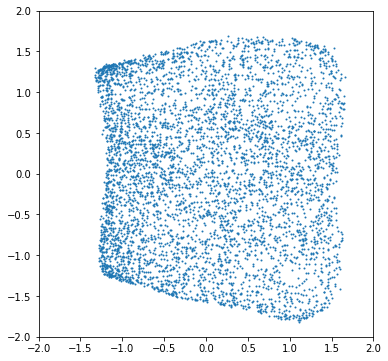

In [ ]:
z_mean, z_sd = vae.encode(train_data)
print(z_mean.shape)

plt.figure(figsize=(6, 6))
plt.scatter(z_mean[:, -2], z_mean[:, -1], s=1)
plt.xlim(-2, 2)
plt.ylim(-2, 2);

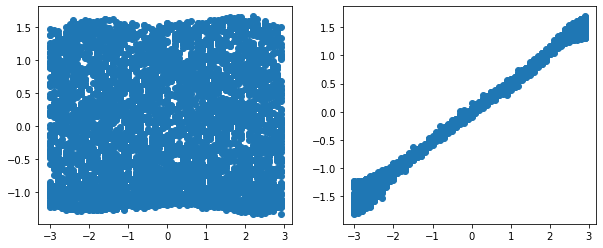

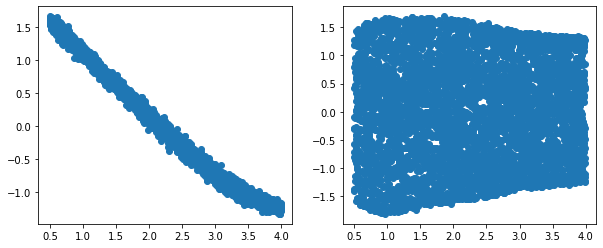

In [ ]:
# Compare real shift and width and VAE parameters

_, (ax0, ax1) = plt.subplots(1,2, figsize = (10,4))
ax0.scatter(mu_real, z_mean[:,0])
ax1.scatter(mu_real, z_mean[:,1])

_, (ax0, ax1) = plt.subplots(1,2, figsize = (10,4))
ax0.scatter(sig_real, z_mean[:,0])
ax1.scatter(sig_real, z_mean[:,1])

Plot the learned manifold:

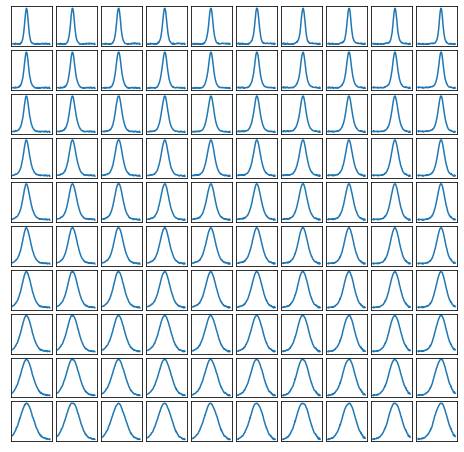

In [ ]:
vae.manifold2d(d=10);

Now train a shift-invariant VAE model (note that ```trVAE``` works both for 2D and 1D cases. For 2D case, ```coord=1``` corresponds to rotational invariance, ```coord=2``` corresponds to translational invariance, and ```coord=3``` - to both. For 1D case, we have only translational invariance so we get the same model for ```coord = 1, 2, 3``` )

In [ ]:
in_dim = (100,)

# Initialize shift-invariant VAE
vae = pv.models.trVAE(in_dim, latent_dim=2, coord=1, seed=0)

# Initialize SVI trainer
trainer = pv.trainers.SVItrainer(vae)

# Train for n epochs:
for e in range(250):
    trainer.step(train_loader)
    trainer.print_statistics()

Epoch: 1 Training loss: 65.0625
Epoch: 2 Training loss: 62.2327
Epoch: 3 Training loss: 61.8804
Epoch: 4 Training loss: 61.8366
Epoch: 5 Training loss: 61.7903
Epoch: 6 Training loss: 61.6995
Epoch: 7 Training loss: 61.4754
Epoch: 8 Training loss: 61.3742
Epoch: 9 Training loss: 61.2831
Epoch: 10 Training loss: 61.2403
Epoch: 11 Training loss: 61.2473
Epoch: 12 Training loss: 61.2732
Epoch: 13 Training loss: 61.2128
Epoch: 14 Training loss: 61.2070
Epoch: 15 Training loss: 61.2095
Epoch: 16 Training loss: 61.2024
Epoch: 17 Training loss: 61.2012
Epoch: 18 Training loss: 61.1967
Epoch: 19 Training loss: 61.1745
Epoch: 20 Training loss: 61.1509
Epoch: 21 Training loss: 61.1447
Epoch: 22 Training loss: 61.1542
Epoch: 23 Training loss: 61.1801
Epoch: 24 Training loss: 61.1854
Epoch: 25 Training loss: 61.1661
Epoch: 26 Training loss: 61.1684
Epoch: 27 Training loss: 61.1507
Epoch: 28 Training loss: 61.1641
Epoch: 29 Training loss: 61.1595
Epoch: 30 Training loss: 61.1387
Epoch: 31 Training 

Encode train data into the latent space:

torch.Size([5000, 3])


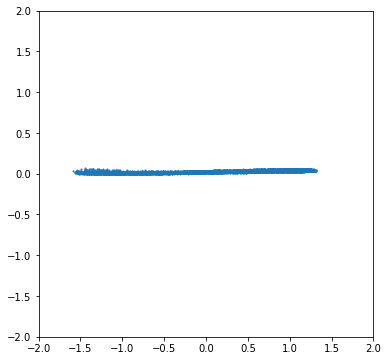

In [ ]:
z_mean, z_sd = vae.encode(train_data)
print(z_mean.shape)

plt.figure(figsize=(6, 6))
plt.scatter(z_mean[:, -2], z_mean[:, -1], s=1)
plt.xlim(-2, 2)
plt.ylim(-2, 2);

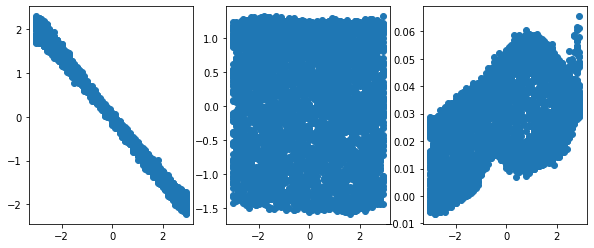

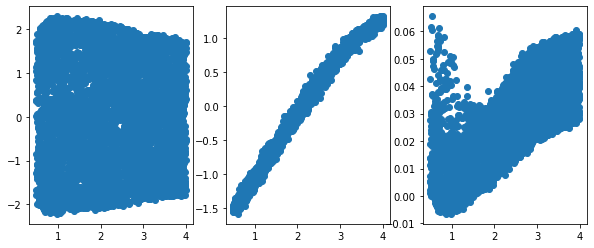

In [ ]:
# Compare real shift and width and VAE parameters

_, (ax0, ax1, ax2) = plt.subplots(1,3, figsize = (10,4))
ax0.scatter(mu_real, z_mean[:,0])
ax1.scatter(mu_real, z_mean[:,1])
ax2.scatter(mu_real, z_mean[:,2])

_, (ax0, ax1, ax2) = plt.subplots(1,3, figsize = (10,4))
ax0.scatter(sig_real, z_mean[:,0])
ax1.scatter(sig_real, z_mean[:,1])
ax2.scatter(sig_real, z_mean[:,2])

Plot the learned manifold:

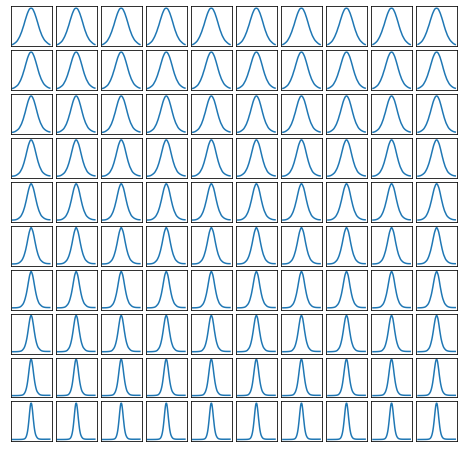

In [ ]:
vae.manifold2d(d=10);